# Red Recurrente LSTM
## Imports Necesarios

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM
#from keras.layers import Flatten
#from keras.optimizers import Adam
#from pyimagesearch import models

Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

## Cargar archivo de Entradas

In [2]:
#cargamos los datos de entrada
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin.csv", index_col=0)
#veamos cuantas dimensiones y registros contiene
#data.shape
# Ver los 1ros registros
data.head()

,hors,ws,wd,anno,mes,wp1
0,1,2.47,108.68,2009,7,0.085
1,2,2.40,114.31,2009,7,0.020
2,3,2.51,118.71,2009,7,0.060
3,4,2.73,120.86,2009,7,0.045
4,5,2.93,120.13,2009,7,0.035


## Separar Datos de Entrenamiento (Train) y Test

In [3]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
#data_train = data.sample(frac=1,random_state=200) 
#data_test = data.drop(data_train.index) 

# 75% train y 25% test
data_train, data_test = train_test_split(data, random_state=200)

dataset_train = data_train.values
x_train = dataset_train[:,1:3]
y_train = dataset_train[:,5]

dataset_test = data_test.values
x_test = dataset_test[:,1:3]
y_test = dataset_test[:,5]

#dataX2 =  pd.DataFrame()
#dataX2["ws"] =data_train["ws"]
#dataX2["wd"] =data_train["wd"]
#dataX2["anno"] =data_train["anno"]
#dataX2["mes"] =data_train["mes"]

#x_train= np.array(dataX2,"float32")
#y_train = np.array(data_train['wp1'].values,"float32")

#y_train  

#print(y_train[0:1].shape) 

#x_train.shape

#x_test
x_train

array([[  6.39,  91.96],
       [  4.01, 273.76],
       [  5.83, 144.93],
       ...,
       [  7.41,  55.18],
       [  4.02, 324.39],
       [  2.55, 337.06]])

In [4]:
#x_train

In [5]:
#y_train

## Adaptar Datos para LSTM

In [6]:
#reshape
x_train_re = x_train.reshape((x_train.shape[0],1,x_train.shape[1]))
x_train = x_train_re


x_test_re = x_test.reshape((x_test.shape[0],1,x_test.shape[1]))
x_test = x_test_re



#print(x_train.shape, y_train.shape)

In [7]:
x_train

array([[[  6.39,  91.96]],

       [[  4.01, 273.76]],

       [[  5.83, 144.93]],

       ...,

       [[  7.41,  55.18]],

       [[  4.02, 324.39]],

       [[  2.55, 337.06]]])

In [8]:
y_train

array([0.065, 0.   , 0.19 , ..., 0.546, 0.075, 0.055])

## Crear Modelo, Entrenarlo y Predecir

In [14]:

csv_logger = keras.callbacks.CSVLogger('training.log', separator=',', append=False)

## cargamos las 4 combinaciones de las compuertas XOR
#training_data = x_train
 
# y estos son los resultados que se obtienen, en el mismo orden
#target_data = y_train


# import norm
#from keras.constraints import max_norm
# instantiate norm
#norm = max_norm(3.0)
keras.callbacks.Callback()

#, kernel_constraint=max_norm(3), bias_constraint=max_norm(3))
model = Sequential()
model.add(LSTM(100, return_sequences = True,input_shape=(1, 2)))
model.add(LSTM(100, return_sequences = True ))
model.add(LSTM(100, return_sequences = True ))
model.add(LSTM(100, return_sequences = True ))
model.add(LSTM(100, return_sequences = True ))
model.add(LSTM(100, return_sequences = False ))
model.add(Dense(1, activation="linear"))


model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

#metrics=['accuracy']
 
hist=model.fit(x_train, y_train, epochs=25, batch_size=300, verbose=2, shuffle=False, callbacks=[csv_logger])
#validation_data=(x_test, y_test),
 
# evaluamos el modelo
#scores = model.evaluate(x_train, y_train)
 
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print (model.predict(x_train).round())

Epoch 1/25
 - 16s - loss: 0.0360 - binary_accuracy: 0.0784 - mean_squared_error: 0.0360
Epoch 2/25
 - 12s - loss: 0.0286 - binary_accuracy: 0.0783 - mean_squared_error: 0.0286
Epoch 3/25
 - 12s - loss: 0.0285 - binary_accuracy: 0.0783 - mean_squared_error: 0.0285
Epoch 4/25
 - 13s - loss: 0.0285 - binary_accuracy: 0.0783 - mean_squared_error: 0.0285
Epoch 5/25
 - 14s - loss: 0.0285 - binary_accuracy: 0.0783 - mean_squared_error: 0.0285
Epoch 6/25
 - 15s - loss: 0.0284 - binary_accuracy: 0.0783 - mean_squared_error: 0.0284
Epoch 7/25
 - 16s - loss: 0.0284 - binary_accuracy: 0.0783 - mean_squared_error: 0.0284
Epoch 8/25
 - 16s - loss: 0.0284 - binary_accuracy: 0.0783 - mean_squared_error: 0.0284
Epoch 9/25
 - 15s - loss: 0.0284 - binary_accuracy: 0.0783 - mean_squared_error: 0.0284
Epoch 10/25
 - 14s - loss: 0.0284 - binary_accuracy: 0.0783 - mean_squared_error: 0.0284
Epoch 11/25
 - 14s - loss: 0.0283 - binary_accuracy: 0.0783 - mean_squared_error: 0.0283
Epoch 12/25
 - 12s - loss: 0.0

In [15]:
y_pred_train = model.predict(x_train)    
y_pred_test = model.predict(x_test) 

## Obtener Metricas del Modelo

In [16]:
# evaluamos el modelo
scores = model.evaluate(x_train, y_train)

78624/78624 [==============================] - 12s 155us/step


In [17]:
#print("R2:",  r2_keras(y_train, y_pred_train) )
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
#print (model.predict(x_train).round())


loss: 2.80%

binary_accuracy: 7.82%


In [18]:
from sklearn.metrics import r2_score
print('Coefficient of determination Train (R^2): %.2f' % r2_score(y_train, y_pred_train))

Coefficient of determination Train (R^2): 0.34


## Graficar Resultados

In [23]:
neuronas =100
#pred_train = model.predict(x_train)
corr = np.corrcoef(y_train, y_pred_train[:, 0])

In [24]:
pred_test_plot = y_pred_test[2000:2100]
y_test_plot = y_test[2000:2100]

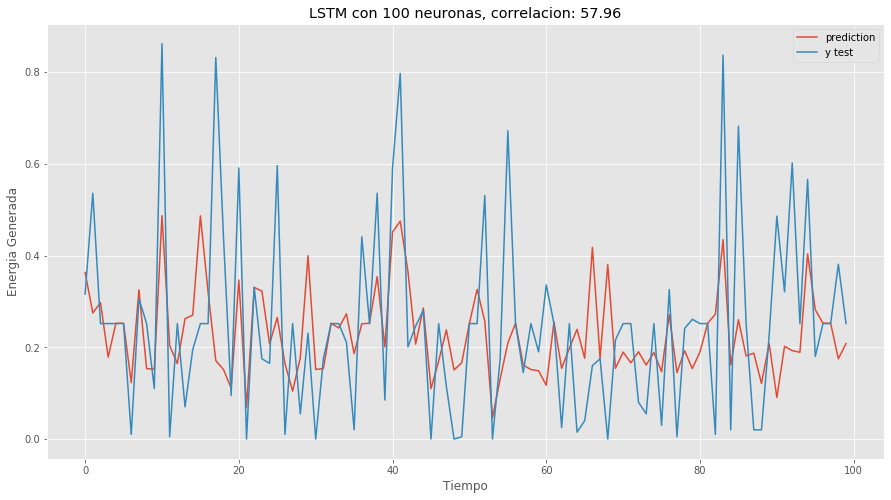

In [25]:
plt.plot(pred_test_plot, label ="prediction")
plt.plot(y_test_plot, label ="y test")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("LSTM con %i neuronas, correlacion: %.2f" % (neuronas, corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Tiempo")
plt.legend()
plt.show()

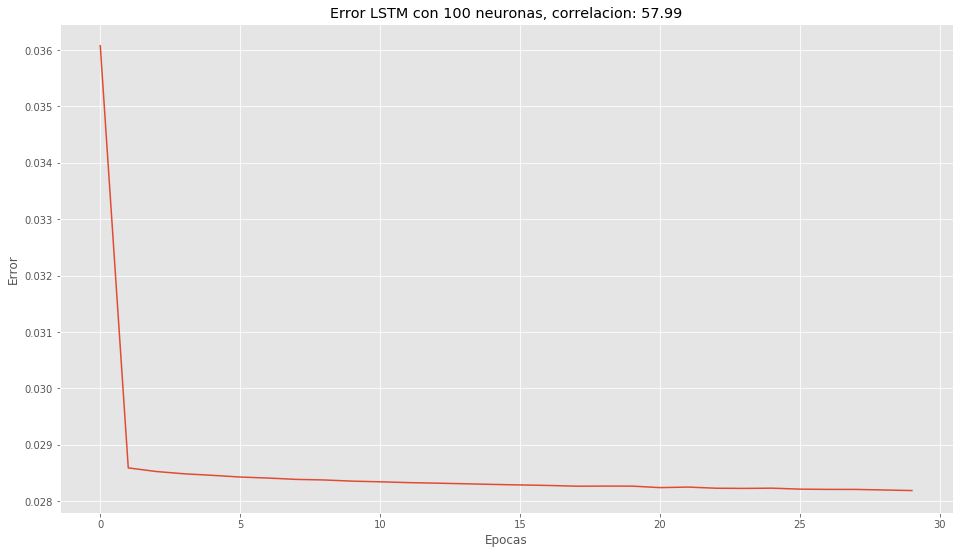

In [183]:
registro = pd.read_csv('training.log', sep=",")
plt.plot(registro["epoch"].values, registro["loss"].values)
plt.title("Error LSTM con %i neuronas, correlacion: %.2f" % (neuronas, corr[1][0] * 100))
plt.ylabel("Error")
plt.xlabel("Epocas")
plt.show()

In [184]:
print(hist.history.keys())

dict_keys(['loss', 'binary_accuracy', 'mean_squared_error'])


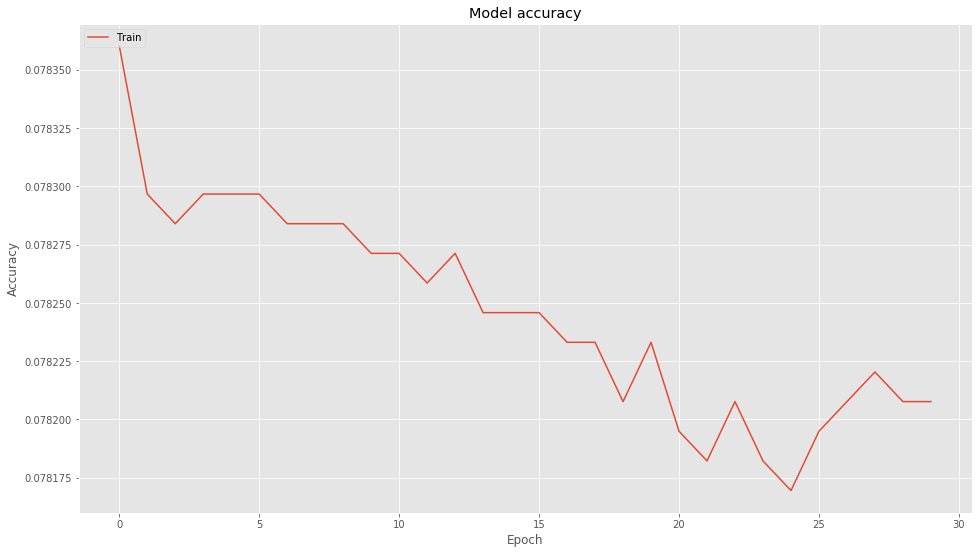

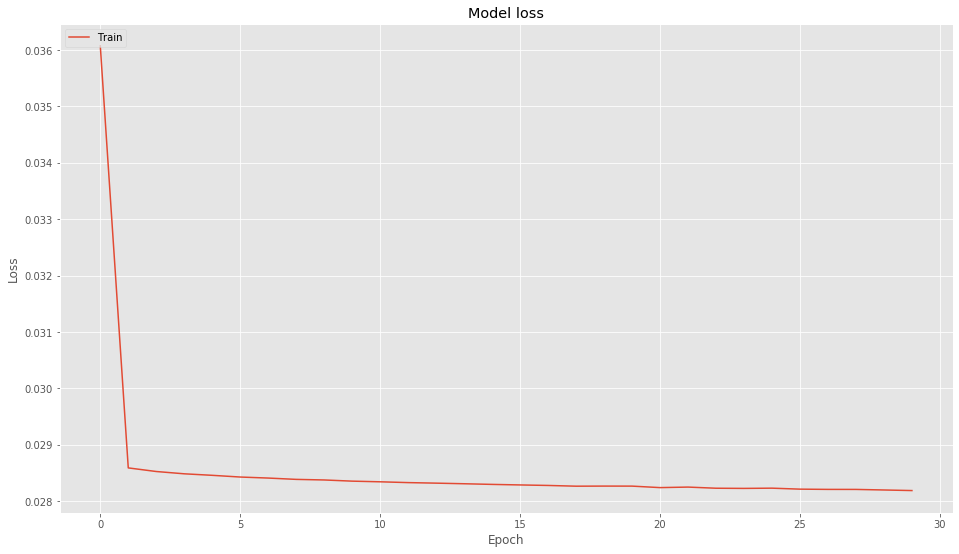

In [185]:
# Plot training & validation accuracy values
plt.plot(hist.history['binary_accuracy'])
#plt.plot(hist.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [187]:
## Vamos a comprobar:
# Quiero predecir cuántos "wp1" voy a obtener por 13 ws (wind speed mph),
# según nuestro modelo, hacemos:

#y_12 = regr.predict([[12,70.4,2012,7]])
#test= np.array([[3.66,106.24,2009,7]])
#y_12 = model.predict(test)


#print(y_12)

In [188]:

#df_test = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/test_24.csv")
#veamos cuantas dimensiones y registros contiene

# Ver los 1ros registros
#df_test.head()

In [189]:
#df_test.describe()

In [37]:
#x_test = df_test[:,1:5]
#y_train = dataset[:,5

In [191]:
 
#df = df_test.values
#x_test = df[:,0:4]

#x_test

#y_12 = model.predict(x_test)

#print(y_12)

In [26]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_iter1_LSTM.csv')
